# Implementation of most common ML algorithms on the well-known iris dataset
#### Total of 8 models are presented. The hyper parameters of each model is optimized first. Then, each model is evaluated.


- LogisticRegression

- DecisionTreeClassifier

- KNeighborsClassifier

- LinearDiscriminantAnalysis

- GaussianNB

- SVC

- RandomForestClassifier

- Neural Network MLPClassifier


#### The approach I have taken is slightly different that most people. I tried to explain the steps as much as possible. 
M.Safaei

In [566]:
# to suspend the future warnings that can be troublesome specially for MLP
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [567]:
# to get around some of the version incompatibily
from __future__ import absolute_import 
from __future__ import division 
from __future__ import print_function 

In [568]:
# importing packages needed for this notebook

from time import time

import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.utils.multiclass import unique_labels


from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [570]:
# Loading the iris dataset directly from seaborn
df = sns.load_dataset("iris")
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [490]:
# names of the lables and features
# df.columns

In [571]:
# descriptions for the features
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [580]:
# let's see if there is anything missing. 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

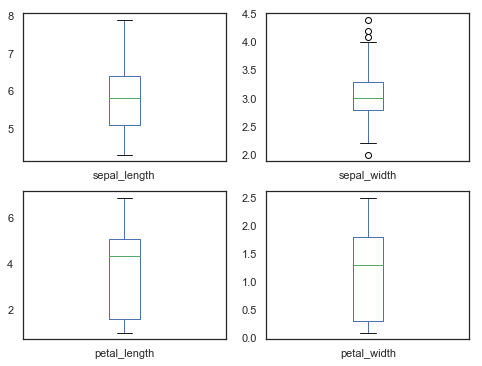

In [578]:
# lets make sure we are not dealing with so many outliers

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8,6))
plt.show()

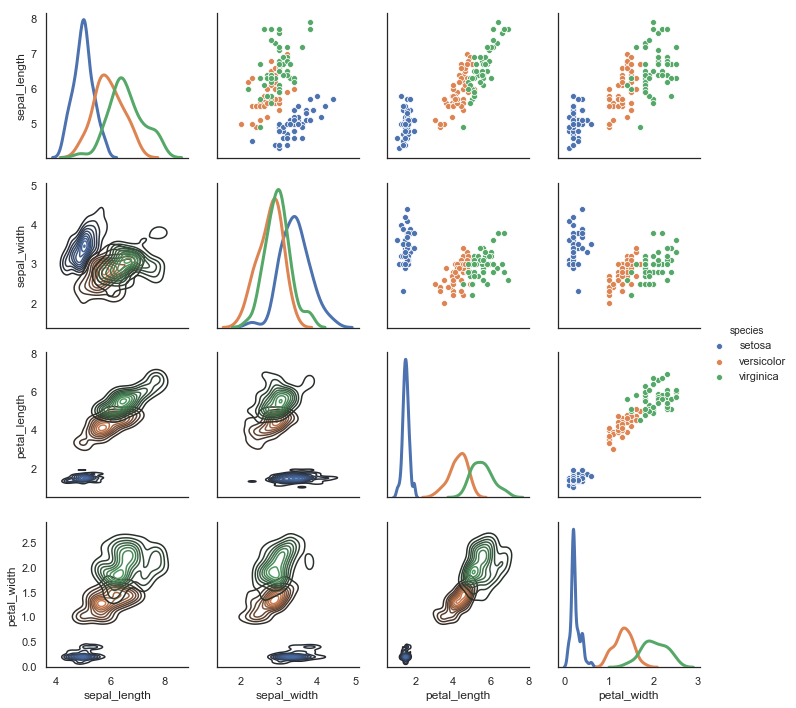

In [574]:
# using seaborn, we can clearly see the correlation between different features for each species

%matplotlib inline
sns.set(style="white")
g = sns.PairGrid(df, diag_sharey=False,hue="species")
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g = g.add_legend()

## The <font color = red>train_test_split </font> can only split in two slices however we desire three segments (train, test and validation)

  - 60% for training
  - 20% for validation
  - 20% for testing

In [689]:
features = df.drop('species', axis=1)
labels = df['species']

# split in two segments
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=51)

# and now split the 40% into half
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=51)

#### The regularization $\lambda$ and other parameters such as max depth and n_estimator need to be carefully using GridSearchCV fine tuned

In [582]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [584]:
# ('model name', model(), {'parametrs': {}})
models = []
models.extend([
                (
                'Gradient Boosting Classifier',
                 GradientBoostingClassifier(), 
                 {'parameters' : {
                                'n_estimators': [5, 50, 250, 500],
                                'max_depth': [1, 3, 5, 7, 9],
                                'learning_rate': [0.01, 0.1, 1, 10, 100]
                                 }
                    }
                  ),
                 (
                 'Logistic Regression', 
                  LogisticRegression(),
                  {'parameters': {
                                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,100000]
                                }
                  }
                 ),
                 (
                 'Random Forest Classifier', 
                  RandomForestClassifier(),
                  {'parameters':  {
                    'n_estimators': [5, 50, 250],
                    'max_depth': [2, 4, 8, 16, 32, None]
                                    }
                  }
                 ),
                 (
                 'Support Vector Classifier', 
                  SVC(),
                  {'parameters':  {
                    'kernel': ['linear', 'rbf'],
                    'C': [0.1, 1, 10]
                                    }
                  }
                 ),  
                 (
                 'KNN', 
                  KNeighborsClassifier(),
                  {'parameters':  {
                    'n_neighbors': [3,5],
                    'leaf_size': [10, 30]
                                    }
                  }
                 ),
                 (
                 'Decision Tree Classifier', 
                  DecisionTreeClassifier(),
                  {'parameters':  {
                    'max_depth': [1, 3, 5, 7, 9]
                                    }
                  }
                 ),    


                 (
                 'Neural Network Classifier', 
                  MLPClassifier(),
                  {'parameters':  {
                    'hidden_layer_sizes': [(10,), (50,), (100,)],
                    'activation': ['relu', 'tanh', 'logistic'],
                    'learning_rate': ['constant', 'invscaling', 'adaptive']
                                    }
                  }
                 ),
                 (
                 'Gaussian Naive Bayes', 
                  GaussianNB(),
                  {'parameters':  {
                                    }
                  }
                 ), 
                 (
                 'Linear Discriminant Analysis', 
                  LinearDiscriminantAnalysis(),
                  {'parameters':  {
                                    }
                  }
                 )
                        ])




# Optimizing the hyperparameters

In [736]:
# models=modelsOriginal[4:5]
# models

In [585]:
fit_model_list = []

In [586]:
# Run the loop and find the best Hyper Parameters for all models
parameters = 0
# models = [models[4]]
for i in range(len(models)):
    model_temp = models[i][1]
    del parameters
    parameters = models[i][2]['parameters']


    cv = GridSearchCV(model_temp, parameters, cv=5)
    cv.fit(X_train, y_train.values.ravel())
    cv.best_params_
    print('Model Name: {}\n\t Best Parameters: {}'.format(models[i][0],cv.best_params_))
    fit_model_list.append(tuple([models[i][0],tuple([cv.best_params_]),tuple([cv.best_estimator_])]))

Model Name: Gradient Boosting Classifier
	 Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Model Name: Logistic Regression
	 Best Parameters: {'C': 100}
Model Name: Random Forest Classifier
	 Best Parameters: {'max_depth': 2, 'n_estimators': 250}
Model Name: Support Vector Classifier
	 Best Parameters: {'C': 10, 'kernel': 'linear'}
Model Name: KNN
	 Best Parameters: {'leaf_size': 10, 'n_neighbors': 3}
Model Name: Decision Tree Classifier
	 Best Parameters: {'max_depth': 3}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Model Name: Neural Network Classifier
	 Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
Model Name: Gaussian Naive Bayes
	 Best Parameters: {}
Model Name: Linear Discriminant Analysis
	 Best Parameters: {}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Correlation Map Function Definition

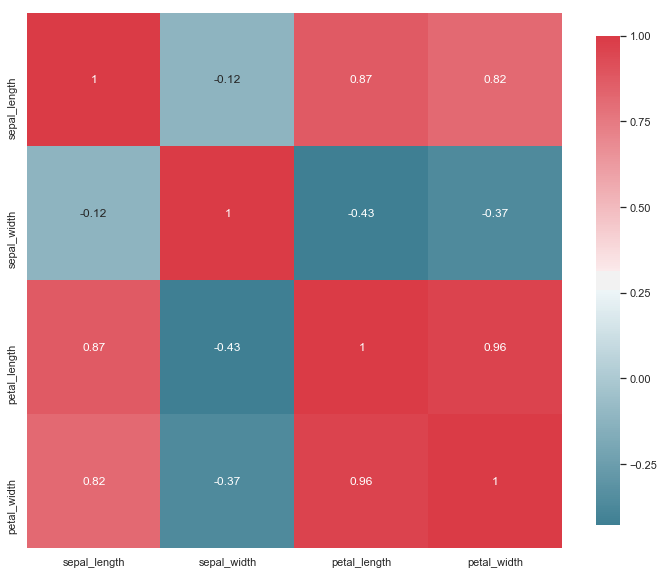

In [737]:
# this defines the histogram for correlation map
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

    
# Correlation Map
plot_correlation_map( df.drop('species', axis=1) )

In [587]:
# a simple double check
for i in range(len(models)):
    print(fit_model_list[i][0],fit_model_list[i][1] )

Gradient Boosting Classifier ({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50},)
Logistic Regression ({'C': 100},)
Random Forest Classifier ({'max_depth': 2, 'n_estimators': 250},)
Support Vector Classifier ({'C': 10, 'kernel': 'linear'},)
KNN ({'leaf_size': 10, 'n_neighbors': 3},)
Decision Tree Classifier ({'max_depth': 3},)
Neural Network Classifier ({'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'},)
Gaussian Naive Bayes ({},)
Linear Discriminant Analysis ({},)


In [588]:
# Here is the whole optimized models defined 
for i in range(len(models)):
#     print(fit_model_list[i][0],fit_model_list[i][2][0] )
    print(fit_model_list[i][2][0] ,'\n\n')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min

# Metrics 
 - Accuracy
 
            In multilabel classification, this function computes subset accuracy the set of labels predicted for a sample must *exactly* match the corresponding set of labels in y_true

        predicted correctly/ total number of examples


 - Precision
            The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of true positives and ``fp`` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative

 - Recall
        Predicted survaving that really survived / Total number that really survived

### Here we see an example of the output for a fit model, later we see we need to convert it to numerics

In [598]:
# mm = cv.best_estimator_
mm.predict(X_val)

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor'],
      dtype='<U10')

In [631]:
# in the next section we need to change them to numerics

# precision_score

In [642]:
y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))
for i in range(len(models)):
    y_pred = fit_model_list[i][2][0].predict(X_val)
    y_pred

    y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
    y_pred_new

    print(
         '{:30}'.format(fit_model_list[i][0]),
        'precision',round(precision_score(y_val_new, y_pred_new,average='micro'),3),
         )

Gradient Boosting Classifier   precision 0.867
Logistic Regression            precision 0.9
Random Forest Classifier       precision 0.867
Support Vector Classifier      precision 0.933
KNN                            precision 0.967
Decision Tree Classifier       precision 0.867
Neural Network Classifier      precision 0.933
Gaussian Naive Bayes           precision 0.867
Linear Discriminant Analysis   precision 0.967


# accuracy_score

In [643]:
y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))
for i in range(len(models)):
    y_pred = fit_model_list[i][2][0].predict(X_val)
    y_pred

    y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
    y_pred_new

    print(
         '{:30}'.format(fit_model_list[i][0]),
        'accuracy_score', round(accuracy_score(y_val_new, y_pred_new),3),
         )

Gradient Boosting Classifier   accuracy_score 0.867
Logistic Regression            accuracy_score 0.9
Random Forest Classifier       accuracy_score 0.867
Support Vector Classifier      accuracy_score 0.933
KNN                            accuracy_score 0.967
Decision Tree Classifier       accuracy_score 0.867
Neural Network Classifier      accuracy_score 0.933
Gaussian Naive Bayes           accuracy_score 0.867
Linear Discriminant Analysis   accuracy_score 0.967


# recall_score

In [644]:
y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))
for i in range(len(models)):
    y_pred = fit_model_list[i][2][0].predict(X_val)
    y_pred

    y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
    y_pred_new

    print(
         '{:30}'.format(fit_model_list[i][0]),
        'recall_score', recall_score(y_val_new, y_pred_new,average=None)
         )

Gradient Boosting Classifier   recall_score [0.75       0.92307692 1.        ]
Logistic Regression            recall_score [0.83333333 0.92307692 1.        ]
Random Forest Classifier       recall_score [0.75       0.92307692 1.        ]
Support Vector Classifier      recall_score [1.         0.84615385 1.        ]
KNN                            recall_score [0.91666667 1.         1.        ]
Decision Tree Classifier       recall_score [0.75       0.92307692 1.        ]
Neural Network Classifier      recall_score [1.         0.84615385 1.        ]
Gaussian Naive Bayes           recall_score [0.75       0.92307692 1.        ]
Linear Discriminant Analysis   recall_score [0.91666667 1.         1.        ]


# Classification Report

In [649]:
for i in range(len(models)-1):
    name = fit_model_list[i][0]
    # fit
    print(name)
    model = fit_model_list[i][2][0];
#     print(model)
    model.fit(X_train,y_train)
    predictions = model.predict(X_val)
    print(classification_report(y_val, predictions),'\n')

Gradient Boosting Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.86      0.92      0.89        13
   virginica       0.91      0.83      0.87        12

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30
 

Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.86      0.92      0.89        13
   virginica       0.91      0.83      0.87        12

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30
 

Random Forest Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.80      0.92      0.86        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Confusion Matrix

In [650]:
for i in range(len(models)):
    name = fit_model_list[i][0]
    # fit
    print(name)
    model = fit_model_list[i][2][0];
#     print(model)
    model.fit(X_train,y_train)
    predictions = model.predict(X_val)
    print(confusion_matrix(y_val, predictions),'\n')
    
    

Gradient Boosting Classifier
[[ 5  0  0]
 [ 0 12  1]
 [ 0  2 10]] 

Logistic Regression
[[ 5  0  0]
 [ 0 12  1]
 [ 0  2 10]] 

Random Forest Classifier
[[ 5  0  0]
 [ 0 12  1]
 [ 0  3  9]] 

Support Vector Classifier
[[ 5  0  0]
 [ 0 11  2]
 [ 0  0 12]] 

KNN
[[ 5  0  0]
 [ 0 13  0]
 [ 0  1 11]] 

Decision Tree Classifier
[[ 5  0  0]
 [ 0 12  1]
 [ 0  3  9]] 

Neural Network Classifier
[[ 5  0  0]
 [ 0 12  1]
 [ 0  2 10]] 

Gaussian Naive Bayes
[[ 5  0  0]
 [ 0 12  1]
 [ 0  3  9]] 

Linear Discriminant Analysis
[[ 5  0  0]
 [ 0 13  0]
 [ 0  1 11]] 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Accuracy Score

## We see that Gradient Boost was overfit. It's hyper parameters need to be optimized using GridSearchCV()

In [652]:
class_names =  list(set(df['species']))
class_names

['virginica', 'versicolor', 'setosa']

In [653]:
# creat a numpy array of the different labels name
class_names = np.array(class_names, dtype='<U10')
class_names

array(['virginica', 'versicolor', 'setosa'], dtype='<U10')

# Confusion Matrix for all Models

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


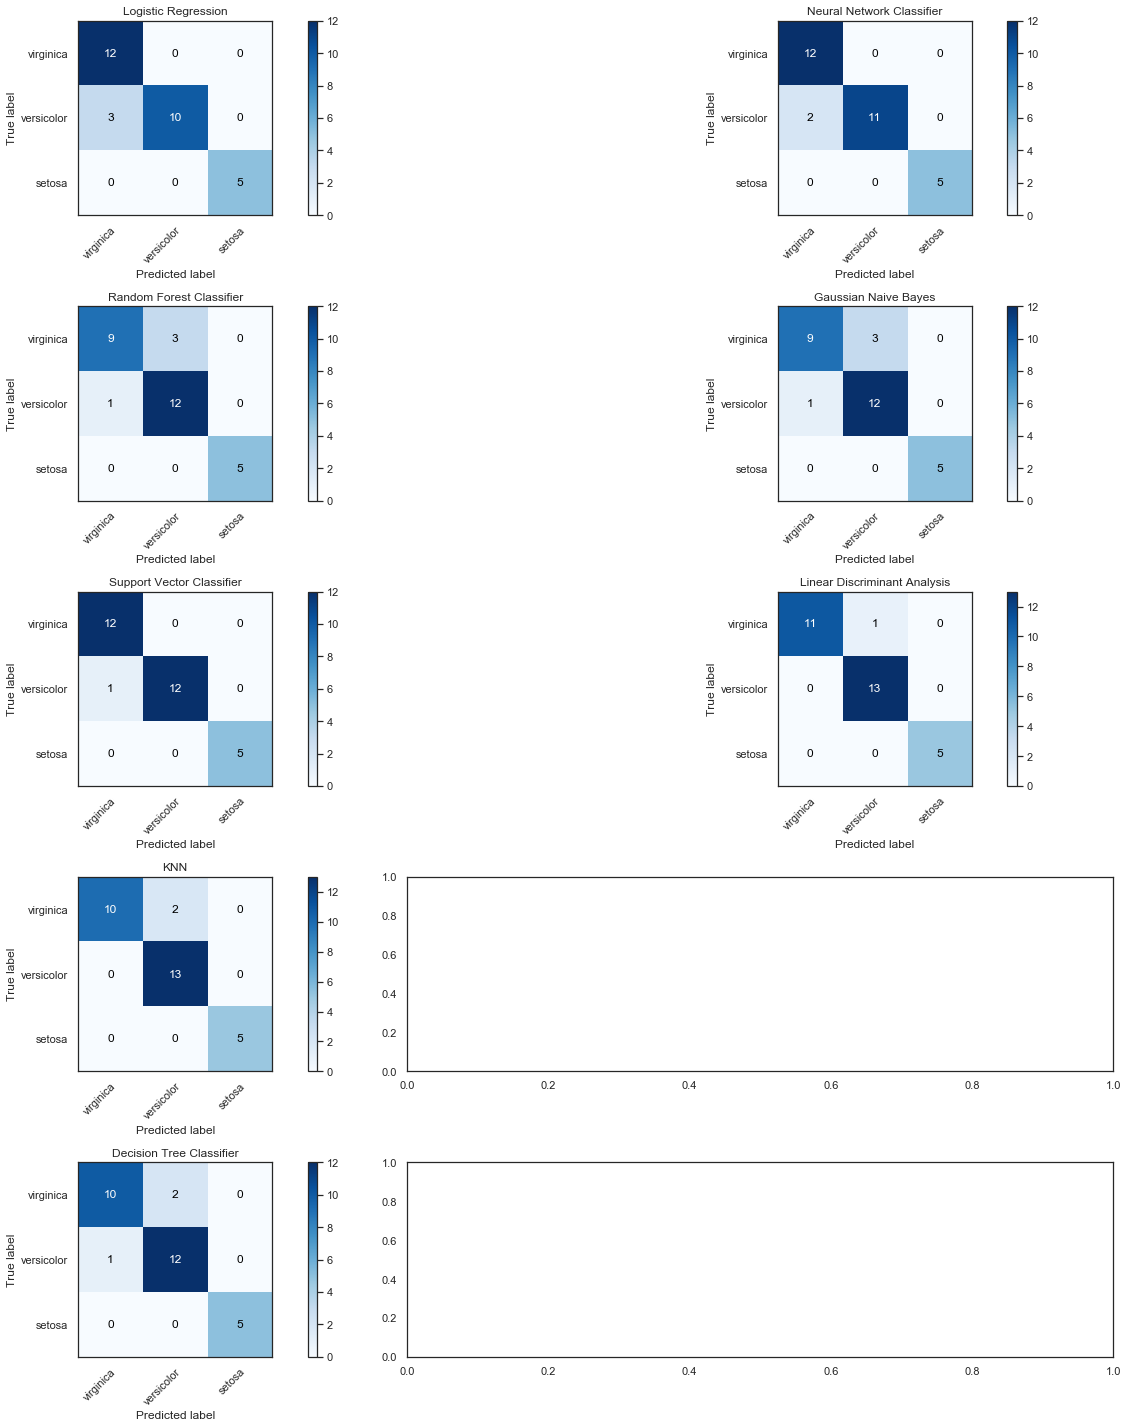

In [727]:
normalize=False
title=None
cmap=plt.cm.Blues
# Compute confusion matrix

            
num_each = int(np.ceil(len(models)/2.0))

fig, axarr = plt.subplots(num_each,2,figsize=(20, 20))

ii = 0
for jk in range(2):
    for k in range(num_each):
        ii+=1
        if ii > len(models)-1: break
        
        model = models[ii][1]
        model_name = models[ii][0]
            # fit
        y_pred = model.fit(X_train,y_train).predict(X_val)

        y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
        y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))


        cm = confusion_matrix(y_val_new, y_pred_new)
        # Only use the labels that appear in the data

  
        classes = class_names[unique_labels(y_val_new, y_pred_new)]
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        ax = axarr[k, jk]
        
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=model_name,
            # title=title,
            ylabel='True label',
            xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()


# Normalized Confusion Matrix for all Models

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


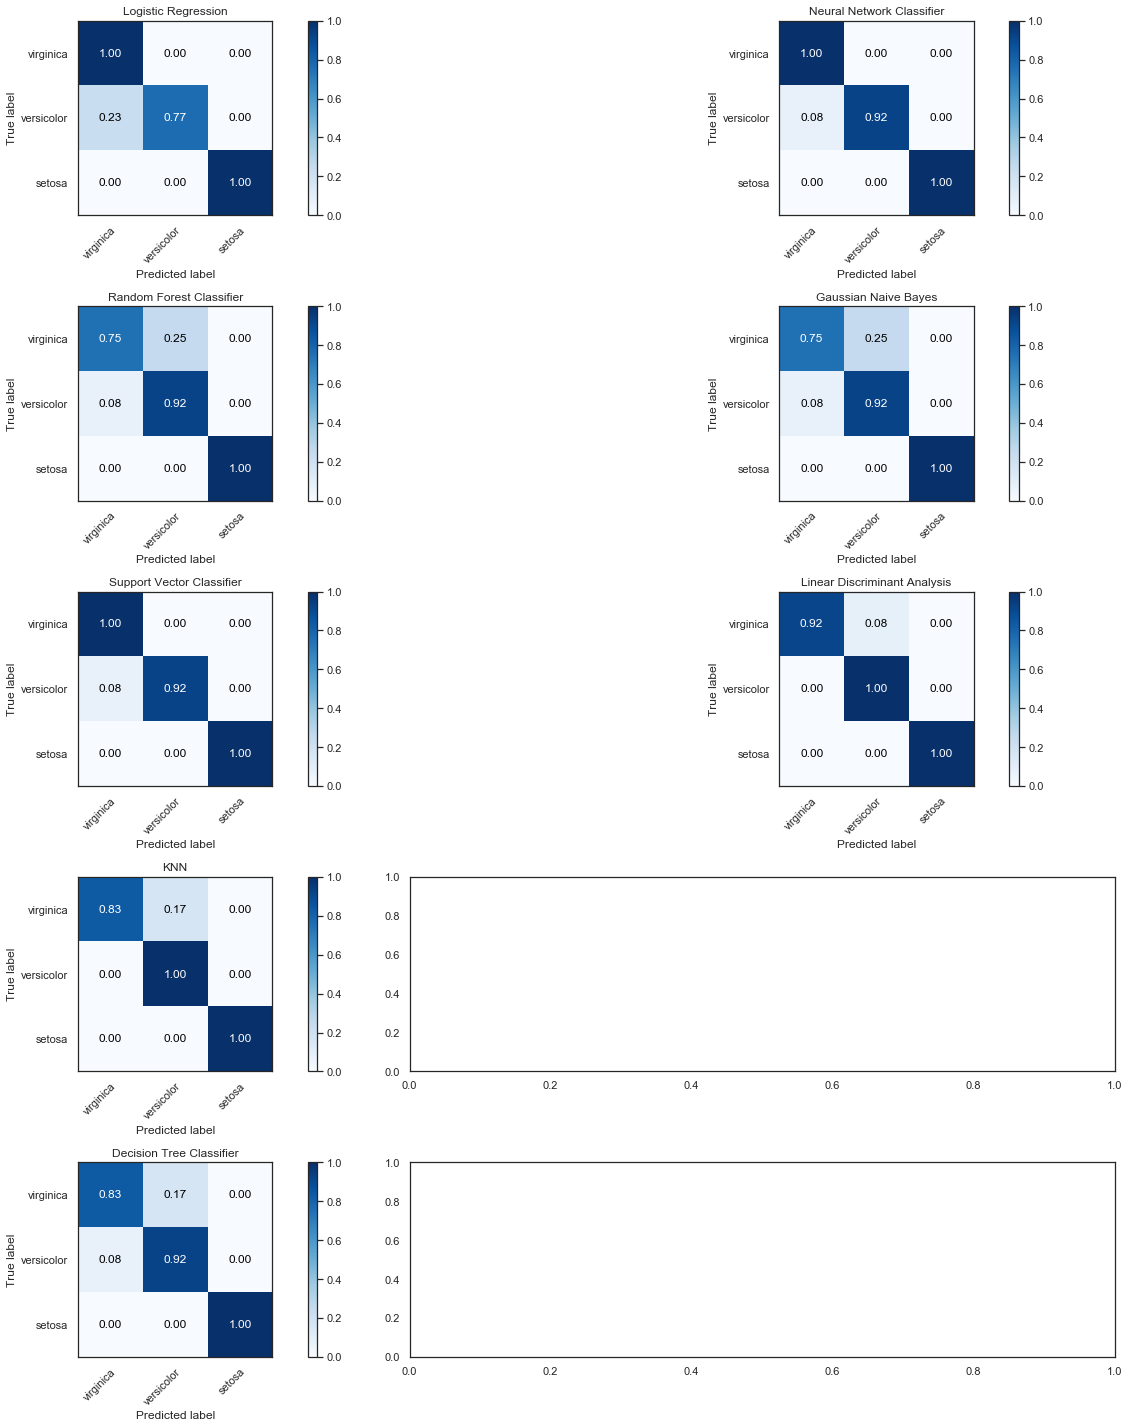

In [731]:
normalize=True
title=None
cmap=plt.cm.Blues
# Compute confusion matrix          
num_each = int(np.ceil(len(models)/2.0))
fig, axarr = plt.subplots(num_each,2,figsize=(20, 20))
ii = 0
for jk in range(2):
    for k in range(num_each):
        ii+=1
        if ii > len(models)-1: break
        
        model = models[ii][1]
        model_name = models[ii][0]
            # fit
        y_pred = model.fit(X_train,y_train).predict(X_val)

        y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
        y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))

        cm = confusion_matrix(y_val_new, y_pred_new)
        # Only use the labels that appear in the data

        classes = class_names[unique_labels(y_val_new, y_pred_new)]
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        ax = axarr[k, jk]
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=model_name,
            # title=title,
            ylabel='True label',
            xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

In [735]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# This is individual confusion plot
def confusion_plot(i):
    name  = models[i][0]
    model = models[i][1]
        # fit
    y_pred = model.fit(X_train,y_train).predict(X_val)

    y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
    y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_val_new, y_pred_new, classes=class_names,title='Confusion matrix, without normalization')
    
    
def confusion_plot_normalized(i):
    name  = models[i][0]
    model = models[i][1]
        # fit
    y_pred = model.fit(X_train,y_train).predict(X_val)

    y_pred_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_pred )))
    y_val_new = np.array(list(map(lambda b: 0 if b=='virginica' else (1 if b =='versicolor' else 2),y_val )))
    # Plot normalized confusion matrix
    plot_confusion_matrix(y_val_new, y_pred_new, classes=class_names,title='Normalized confusion matrix',normalize=True,)

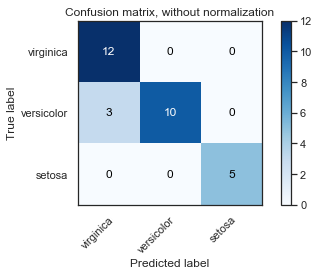

In [734]:
confusion_plot(1)